In [20]:
from turtle import color
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#preprocessing data
data=pd.read_csv(r'/home/harshal/Downloads/insurance.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [21]:
print(data.isnull().sum())
data=data.interpolate()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [22]:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [23]:
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'children'}>,
        <AxesSubplot: title={'center': 'charges'}>]], dtype=object)

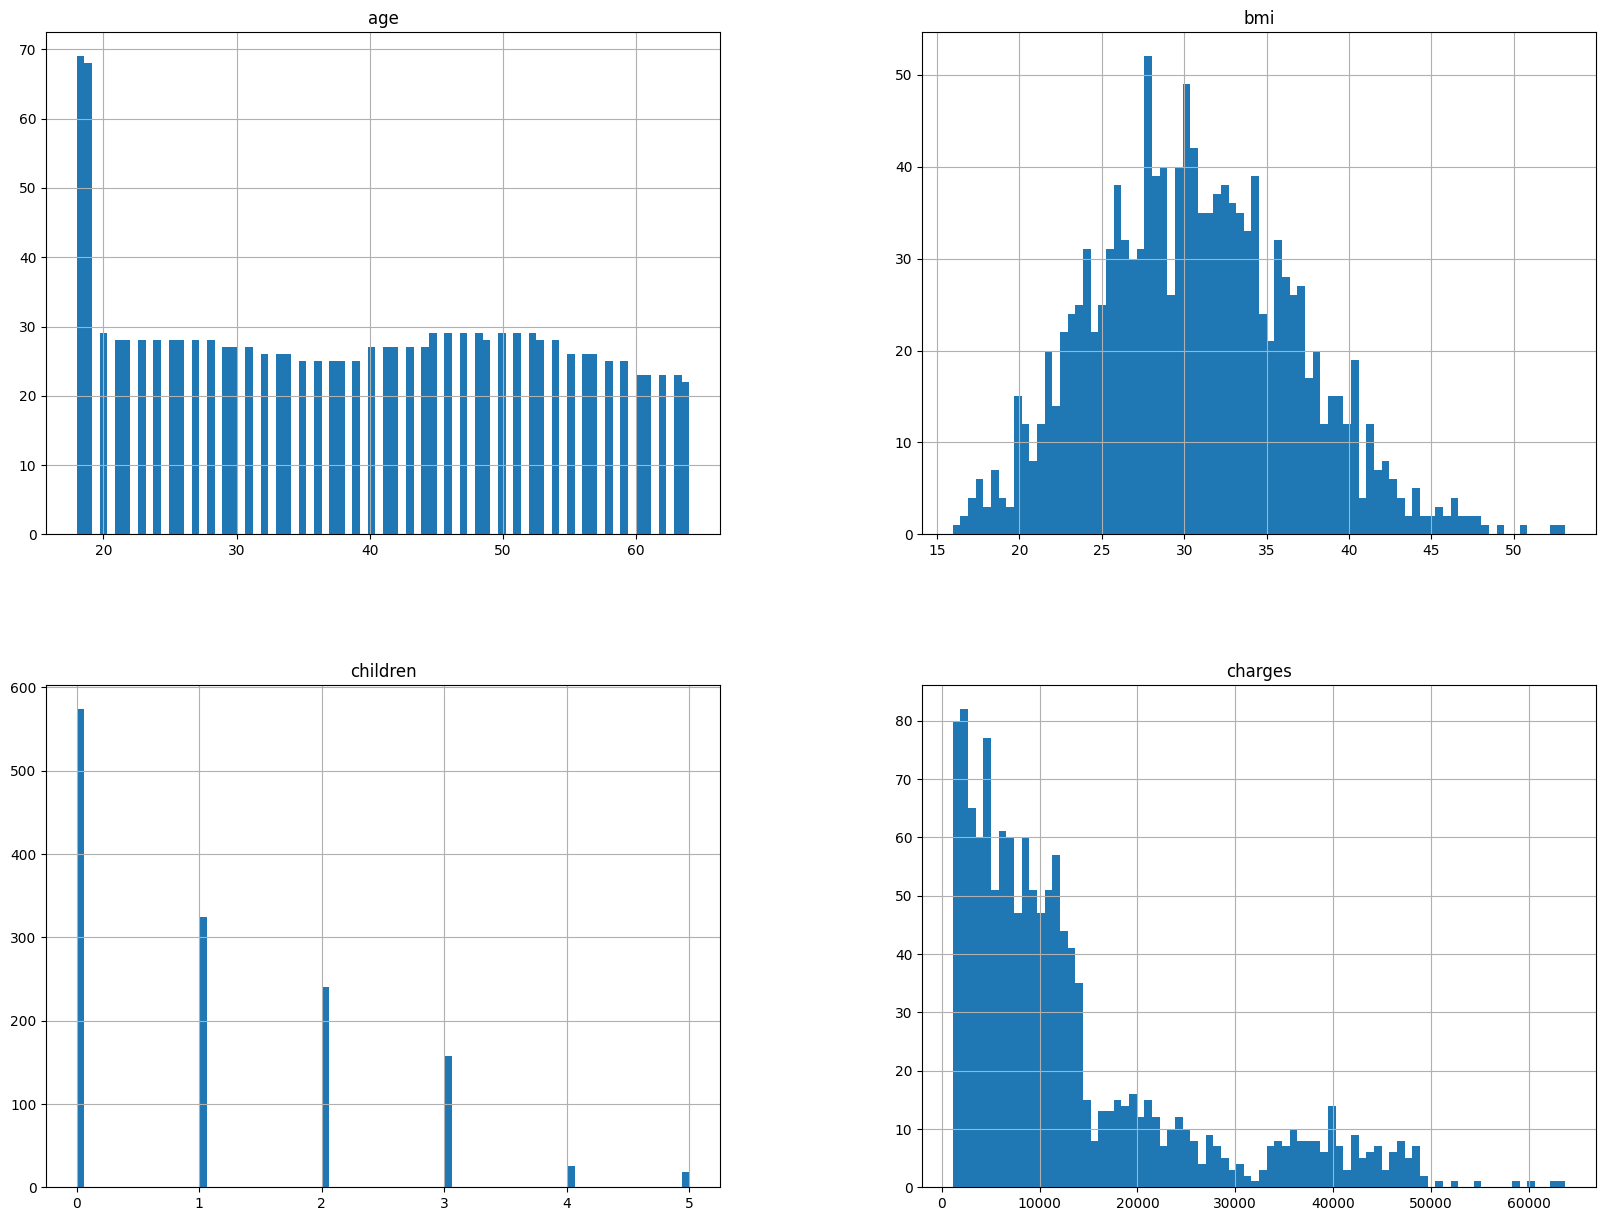

In [24]:
data.hist(bins=80,figsize=(20,15))

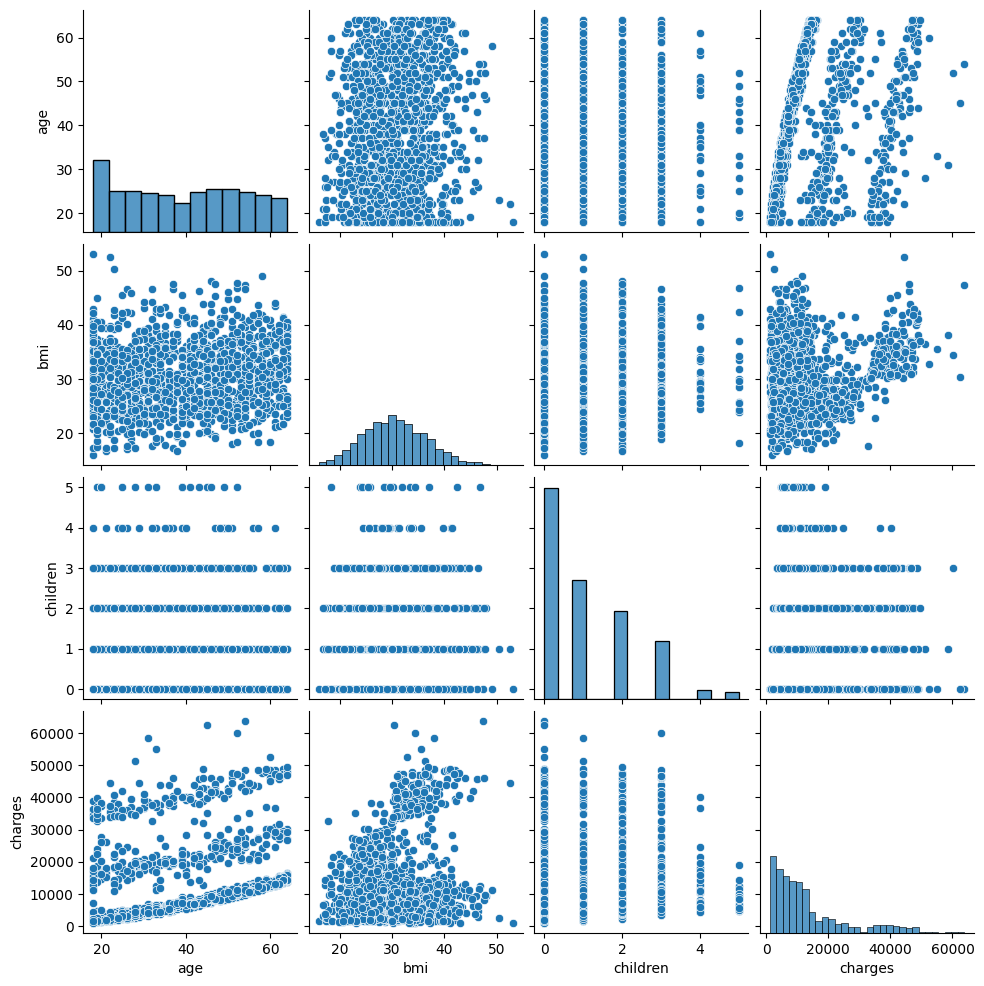

In [25]:
sns.pairplot(data)

In [26]:
dd=data.corr()
print(dd)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


/tmp/ipykernel_3012/825731663.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dd=data.corr()


/tmp/ipykernel_3012/2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

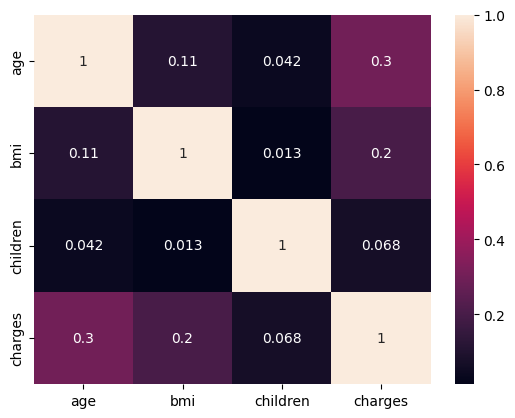

In [27]:
sns.heatmap(data.corr(),annot=True)

In [28]:
se=pd.get_dummies(data['sex'])
smo=pd.get_dummies(data['smoker'])
reg=pd.get_dummies(data['region'])
print(reg.sum())

northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64


In [29]:
data=pd.concat([data,se,smo,reg],axis=1)
data=data.drop(['sex','smoker','region'],axis=1)
data=data.drop(columns=['children','southwest','bmi','female','no'],axis=1)
print(data)

      age      charges  male  yes  northeast  northwest  southeast
0      19  16884.92400     0    1          0          0          0
1      18   1725.55230     1    0          0          0          1
2      28   4449.46200     1    0          0          0          1
3      33  21984.47061     1    0          0          1          0
4      32   3866.85520     1    0          0          1          0
...   ...          ...   ...  ...        ...        ...        ...
1333   50  10600.54830     1    0          0          1          0
1334   18   2205.98080     0    0          1          0          0
1335   18   1629.83350     0    0          0          0          1
1336   21   2007.94500     0    0          0          0          0
1337   61  29141.36030     0    1          0          1          0

[1338 rows x 7 columns]


In [30]:
X=data.drop(['charges'],axis=1)
y=data['charges']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

<AxesSubplot: >

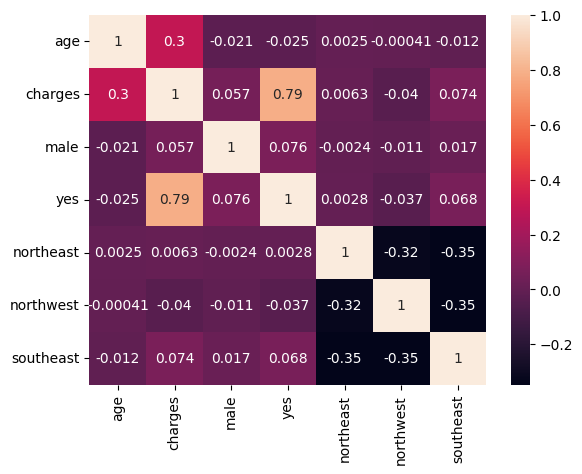

In [31]:
sns.heatmap(data.corr(),annot=True)

In [32]:
from sklearn.linear_model import LinearRegression
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred_test=mlin.predict(X_test)
y_pred_train=mlin.predict(X_train)

In [34]:
print(y_pred_train.shape)
print(y_pred_test.shape)
print(y_test.shape)
print(y_train.shape)

(1070,)
(268,)
(268,)
(1070,)


In [35]:
def gradient(x,y):
     m=(((mean(x)*mean(y)-mean(x*y))/(mean(x)*mean(y)-mean(x*x))))
     b=mean(y)-m*mean(x)
     return m,b        
m1,b1=gradient(y_test,y_pred_test)
print(m1,b1)

0.7230562993394305 3585.02786548067


(0.0, 40000.0)

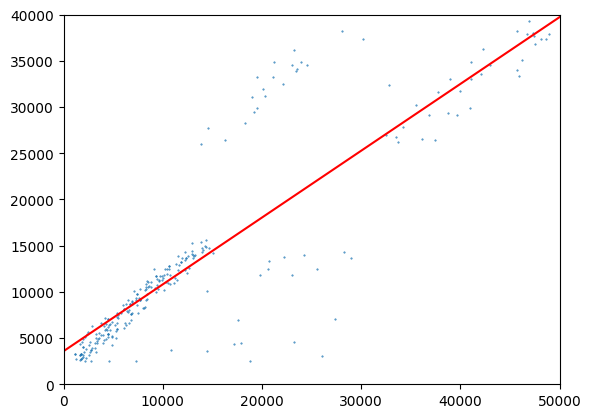

In [47]:
plt.scatter(y_test,y_pred_test,s=0.2)
plt.plot([m1*x1+b1 for x1 in range(330000)], color='red')
plt.xlim(0,50000)
plt.ylim(0,40000)

In [37]:
print(r2_score(y_test,y_pred_test))

0.7723112341412253
